In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [3]:
d = pd.read_csv("/content/cassifation.csv")

In [4]:
d.head()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C


In [5]:
d.shape

(10, 12)

In [6]:
d.isnull()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
d.isnull().any()

region     False
tenure     False
age        False
income     False
marital    False
address    False
ed         False
employ     False
retire     False
gender     False
reside     False
custcat    False
dtype: bool

In [8]:
d.isnull().sum()

region     0
tenure     0
age        0
income     0
marital    0
address    0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [9]:
X=d.iloc[:,:11]
y=d.iloc[:,11]
X_traine,y_traine,X_test,ytest=train_test_split(X, y)

In [10]:

d['custcat'].value_counts()

C    4
A    2
D    2
B    2
Name: custcat, dtype: int64

In [11]:
y= d['custcat']
y

0    A
1    D
2    C
3    A
4    C
5    C
6    B
7    D
8    C
9    B
Name: custcat, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


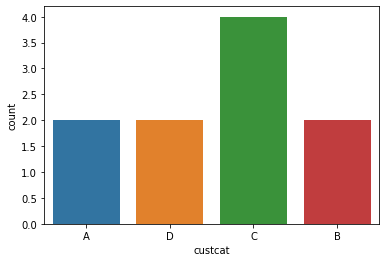

In [14]:
import seaborn
seaborn.countplot(d['custcat'])

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
test = SelectKBest(score_func= f_classif, k=5)
test.fit(X,y)
pd.DataFrame(test.scores_)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,0
0,0.342857
1,1.781221
2,0.818692
3,1.015231
4,0.400000
5,0.499527
6,0.830769
7,1.226374
8,NaN
9,0.400000


In [18]:
X=d[['marital','gender','reside','tenure', 'age', 'address', 'income', 'ed','employ']]

In [19]:

from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=9)

In [20]:

knn.fit(X, y)

KNeighborsClassifier(n_neighbors=9)

In [21]:
pred=knn.predict(X)
pred

array(['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'], dtype=object)

In [22]:

knn.predict(X).shape

(10,)

In [23]:
knn.score(X,y)

0.4

In [24]:

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [25]:
accuracy_score(y,pred)

0.4

In [26]:
confusion_matrix(y,pred)

array([[0, 0, 2, 0],
       [0, 0, 2, 0],
       [0, 0, 4, 0],
       [0, 0, 2, 0]])

Text(0.5, 257.44, 'Predicted label')

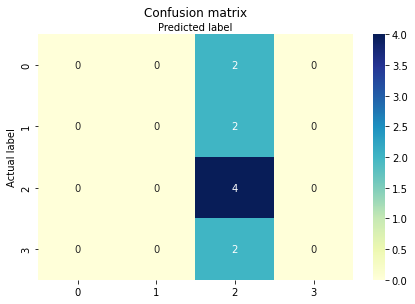

In [27]:
%matplotlib inline

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

seaborn.heatmap(pd.DataFrame(confusion_matrix(y,pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00         2
           B       0.00      0.00      0.00         2
           C       0.40      1.00      0.57         4
           D       0.00      0.00      0.00         2

    accuracy                           0.40        10
   macro avg       0.10      0.25      0.14        10
weighted avg       0.16      0.40      0.23        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
